In [43]:
import torch
from models import Generator, Discriminator
import matplotlib.pyplot as plt
import os
import torchvision.utils as vutils
import numpy as np
from pathlib import Path
from PIL import Image

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the trained models
G_state_dict = torch.load("models/G_augmented.pt")
D_state_dict = torch.load("models/D_augmented.pt")
G = Generator().to(DEVICE)
D = Discriminator().to(DEVICE)
G.load_state_dict(G_state_dict)
D.load_state_dict(D_state_dict)

<All keys matched successfully>

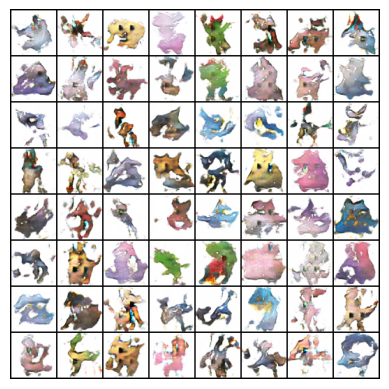

In [44]:
n_pokemon = len(os.listdir("pokemon_images/pokemon_jpg"))
latent_dim = 100
noise = torch.randn(n_pokemon, latent_dim, 1, 1).to(DEVICE)
fake = G(noise).detach().cpu()
# Visualize first 64 fake images
img_grid = vutils.make_grid(fake[:64], padding=2, normalize=True)
plt.imshow(np.transpose(img_grid, (1, 2, 0)))
plt.axis("off")
plt.show()

In [57]:
# Save all generated images to a folder
save_dir_64 = Path("generated_images/img_size_64")
save_dir_64.mkdir(parents=True, exist_ok=True)
save_dir_256 = Path("generated_images/img_size_256")
save_dir_256.mkdir(parents=True, exist_ok=True)
for i in range(n_pokemon):
    fake_img = fake[i].numpy()
    # Change fake_img from -1 to 1 to 0 to 1
    fake_img = (fake_img + 1) / 2
    img = np.transpose(fake_img, (1, 2, 0))
    plt.imsave(f"{save_dir_64}/pokemon_{i}.jpg", img)
    pil_img = Image.fromarray((img * 255).astype(np.uint8))
    img_256 = pil_img.resize((256, 256))
    plt.imsave(f"{save_dir_256}/pokemon_{i}.jpg", img_256)

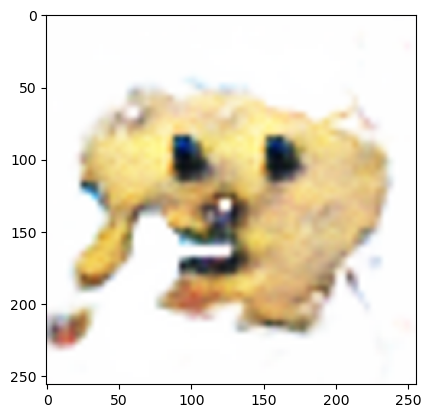

In [55]:
img_64 = fake[2].numpy()
img_64 = (img_64 + 1) / 2
img_64 = np.transpose(img_64, (1, 2, 0))
img_64 = Image.fromarray((img_64 * 255).astype(np.uint8))
img_256 = img_64.resize((256, 256))
plt.imshow(img_256)
plt.show()

To run the followig cell first install the `pytorch-fid` package

In [49]:
test = fake[0].numpy()
np.max(test), np.min(test), np.mean(test), np.std(test)

(1.0, -0.75772125, 0.73684996, 0.37649012)